In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

#XOR with Keras

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

# the four different states of the XOR gate
x_train = np.array([[0,0],[0,1],[1,0],[1,1]])

# the four expected results in the same order
y_train = np.array([[0],[1],[1],[0]])

# activation_softmax = tf.keras.activations.softmax()

model = tf.keras.Sequential()
model.add(layers.Input(shape=2))
model.add(layers.Dense(4, activation='sigmoid')) 	# Try activation='relu'
model.add(layers.Dense(1, activation='sigmoid'))  # Try activation='softmax'

model.compile(loss='mean_squared_error',
              optimizer='SGD',                # Stochastic Gradient Descent
              metrics=['binary_accuracy'])

# model.summary()
model.fit(x_train, y_train, epochs=600, verbose=0)  # Try epochs=1000

model.predict(x_train[1:2])



array([[0.47786525]], dtype=float32)

In [5]:
model.input

<tf.Tensor 'input_1:0' shape=(None, 2) dtype=float32>

In [6]:
model.save('./XORwithKeras.h5')

In [ ]:
new_model = tf.keras.models.load_model('./XORwithKeras.h5')
new_model.summary()
new_model.predict(x_train[1:2])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


array([[0.41470927]], dtype=float32)

In [ ]:
param = [int('1'),int('4')]
new_model.predict([param])

array([[0.36154452]], dtype=float32)

In [ ]:
# x_train[1:2]

##독립변수 1개

In [ ]:
x = np.array([1,2,3,4,5,])
y = np.array([3,5,7,9,11,])
model = tf.keras.Sequential()
model.add(layers.Dense(1, input_shape=(1,)))
model.compile(optimizer='SGD', loss='mse', run_eagerly=True)
model.fit(x,y, epochs=100, verbose=0)
# model.predict(x), model.predict([[10]])

##독립변수 2개

In [ ]:
x = np.array([[0,2],[1,3],[2,4],[3,5],])
y = np.array([6,9,11.5,14.5,])
model = tf.keras.Sequential()
model.add(layers.Input(shape=(2,)))
model.add(layers.Dense(units=1))
model.compile(optimizer='SGD', loss='mse')
model.summary()
model.fit(x,y, epochs=100, verbose=0)
model.predict(x), model.predict([[8,10]])
tf.keras.utils.plot_model(model, 'two_variable.png', show_shapes=True)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# plt.imshow(mpimg.imread('./two_variable.png'))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


##https://www.tensorflow.org/guide/keras/overview

##https://janakiev.com/notebooks/keras-iris/

##https://www.tensorflow.org/datasets/splits

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(784,), name='digits')
x = layers.Dense(64, activation='relu', name='dense_1')(inputs)
x = layers.Dense(64, activation='relu', name='dense_2')(x)
outputs = layers.Dense(10, name='predictions')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
from tensorflow import keras
(X, y), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are Numpy arrays)
X = X.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
# y_train = y_train.astype('float32')
# y_test = y_test.astype('float32')

# Reserve 10,000 samples for validation
# x_val = x_train[-10000:]
# y_val = y_train[-10000:]
# x_train = x_train[:-10000]
# y_train = y_train[:-10000]

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# x_train.shape, x_val.shape

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),  # Optimizer
              # Loss function to minimize
              loss='sparse_categorical_crossentropy',
              # List of metrics to monitor
              metrics=['sparse_categorical_accuracy'],
              run_eagerly=True
              )

In [ ]:
hist = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=3,
                    # We pass some validation for
                    # monitoring validation loss and metrics
                    # at the end of each epoch
                    verbose=0,
                    validation_data=(x_val, y_val)
                    )

# print('\nhistory dict:', hist.history)

In [ ]:
# model.loss

In [ ]:
results = model.evaluate(x_test, y_test, batch_size=128)
print('test loss, test acc:', results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
predictions = model.predict(x_test[2:3])
# predictions

79/79 [==============================] - 1s 7ms/step - loss: 2.2223 - sparse_categorical_accuracy: 0.2488
test loss, test acc: [2.222294330596924, 0.24879999458789825]


#Boston Housing Price dataset with Keras

##normalizing features

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization

# Example image data, with values in the [0, 255] range
training_data = np.random.randint(0, 256, size=(64, 200, 200, 3)).astype("float32")

normalizer = Normalization(axis=-1)
normalizer.adapt(training_data)

normalized_data = normalizer(training_data)
# print("training_data : ", training_data)
# print("var: %.4f" % np.var(normalized_data))
# print("mean: %.4f" % np.mean(normalized_data))

In [ ]:
from tensorflow.keras.datasets import boston_housing

(X, y), (x_test, y_test) = boston_housing.load_data()
# print(X.shape, type(X))

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# x_test = scaler.transform(x_test)

# from tensorflow.keras.layers.experimental.preprocessing import Normalization
# normalizer = Normalization(axis=-1)
# normalizer.adapt(X)
# X = normalizer(X).numpy()
# x_test = normalizer(x_test).numpy()

# X.shape, y.shape, x_test.shape, y_test.shape, type(X), type(y), type(x_test), type(y_test)

57344/57026 [==============================] - 0s 0us/step


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Input(shape=x_train.shape[1]))
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

In [ ]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=16, validation_split=0.2,verbose=0)

In [ ]:
# results = model.evaluate(x_test, y_test)
# results

In [ ]:
predictions = model.predict(x_test[:3])
# predictions, y_test[:3]

In [ ]:
predictions = model.predict(x_test[7:10])
# predictions, y_test[7:10]

In [ ]:
# model.__str__

## Compare Optimizer

In [ ]:
from tensorflow.keras import optimizers
# learning_rate=0.01
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'Adamax', 'Ftrl', 'Nadam', 'RMSprop', 'SGD']
for optimizer in optimizers:
  model = tf.keras.Sequential()
  model.add(layers.Input(shape=x_train.shape[1]))
  model.add(layers.Dense(128, activation='sigmoid'))
  model.add(layers.Dense(1))
  model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['mae'])
  model.fit(x_train, y_train, epochs=100, batch_size=16, validation_split=0.2,verbose=0)
  predictions = model.predict(x_test[:3])
  # print(optimizer ,predictions, y_test[:3])

## Compare loss

In [ ]:
from tensorflow.keras import losses
# https://keras.io/api/losses/
# Probabilistic losses
# losses_name = ['binary_crossentropy','categorical_crossentropy','sparse_categorical_crossentropy','poisson', 'kl_divergence',] 
# Regression losses
losses_name = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'mean_squared_logarithmic_error', 'cosine_similarity', 'huber_loss', 'logcosh']
# Hinge losses for "maximum-margin" classification
# losses_name = ['hinge', 'squared_hinge', 'categorical_hinge', 'mean_squared_logarithmic_error', 'cosine_similarity', 'huber_loss', '']
for loss_name in losses_name:
  model = tf.keras.Sequential()
  model.add(layers.Input(shape=x_train.shape[1]))
  model.add(layers.Dense(128, activation='sigmoid'))
  # model.add(layers.Dense(128, activation='softmax'))
  model.add(layers.Dense(1))
  model.compile(optimizer='SGD',
              loss=loss_name,
              metrics=['mae'])
  model.fit(x_train, y_train, epochs=100, batch_size=16, validation_split=0.2,verbose=0)
  predictions = model.predict(x_test[:3])
  # print(loss_name ,predictions, y_test[:3])

## set Metrics



In [ ]:
from tensorflow.keras import losses
metrics_nm = ['accuracy','mean_squared_error','categorical_accuracy','top_k_categorical_accuracy', 'sparse_top_k_categorical_accuracy',]
# metrics_nm = ['accuracy','categorical_accuracy', 'binary_crossentropy',]
model = tf.keras.Sequential()
model.add(layers.Input(shape=x_train.shape[1]))
model.add(layers.Dense(128, activation='sigmoid'))  # model.add(layers.Dense(128, activation='softmax'))
model.add(layers.Dense(1))

# metrics_nm = [tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.FalseNegatives()]
# # metrics_nm = ['accuracy','categorical_accuracy', 'binary_crossentropy',]
# inputs = tf.keras.Input(shape=x_train.shape[1])
# x1 = tf.keras.layers.Dense(128, activation='sigmoid')(inputs)
# x2 = tf.keras.layers.Dense(128, activation='sigmoid')(x1)
# outputs = tf.keras.layers.Dense(1, activation='softmax')(x2)
# model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='SGD',
            loss='mean_squared_error',
            metrics=metrics_nm)
hist = model.fit(x_train, y_train, epochs=50, batch_size=256, validation_split=0.2,verbose=0)
# predictions = model.predict(x_test[:3])

In [ ]:
hist.history.keys()
# model.load_weights

dict_keys(['loss', 'categorical_accuracy', 'false_negatives', 'val_loss', 'val_categorical_accuracy', 'val_false_negatives'])

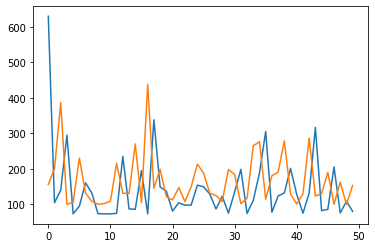

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['val_mean_squared_error'])

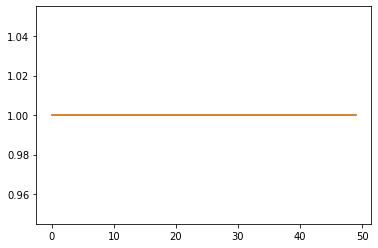

In [ ]:
plt.plot(hist.history['categorical_accuracy'])
plt.plot(hist.history['val_categorical_accuracy'])

##Model.fit()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.datasets import boston_housing

(X, y), (x_test, y_test) = boston_housing.load_data()
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

metrics_nm = ['accuracy','mean_squared_error']
model = tf.keras.Sequential()
model.add(layers.Input(shape=x_train.shape[1]))
model.add(layers.Dense(128, activation='sigmoid'))  # model.add(layers.Dense(128, activation='softmax'))
model.add(layers.Dense(1))

model.compile(optimizer='SGD', loss='mean_squared_error', metrics=metrics_nm)
hist = model.fit(x_train, y_train, epochs=5, batch_size=16, verbose=2, validation_split=0.2)
# hist = model.fit(x_train, y_train, epochs=5, batch_size=265, verbose=1)

# predictions = model.predict(x_test[:3])

Epoch 1/5
17/17 - 0s - loss: 101.2298 - accuracy: 0.0000e+00 - mean_squared_error: 101.2298 - val_loss: 99.2556 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 99.2556
Epoch 2/5
17/17 - 0s - loss: 92.2063 - accuracy: 0.0000e+00 - mean_squared_error: 92.2063 - val_loss: 98.3832 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 98.3832
Epoch 3/5
17/17 - 0s - loss: 91.5349 - accuracy: 0.0000e+00 - mean_squared_error: 91.5349 - val_loss: 134.5359 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 134.5359
Epoch 4/5
17/17 - 0s - loss: 78.0618 - accuracy: 0.0000e+00 - mean_squared_error: 78.0618 - val_loss: 128.8225 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 128.8225
Epoch 5/5
17/17 - 0s - loss: 73.5444 - accuracy: 0.0000e+00 - mean_squared_error: 73.5444 - val_loss: 668.5472 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 668.5472


In [ ]:
hist.history.keys(), hist.history   # epochs 횟수만큼 정보 있음.

(dict_keys(['loss', 'accuracy', 'mean_squared_error', 'val_loss', 'val_accuracy', 'val_mean_squared_error']),
 {'accuracy': [0.0, 0.0, 0.0, 0.0, 0.0],
  'loss': [101.22979736328125,
   92.2063217163086,
   91.53494262695312,
   78.06183624267578,
   73.54441833496094],
  'mean_squared_error': [101.22979736328125,
   92.2063217163086,
   91.53494262695312,
   78.06183624267578,
   73.54441833496094],
  'val_accuracy': [0.0, 0.0, 0.0, 0.0, 0.0],
  'val_loss': [99.25555419921875,
   98.38321685791016,
   134.535888671875,
   128.82249450683594,
   668.5471801757812],
  'val_mean_squared_error': [99.25555419921875,
   98.38321685791016,
   134.535888671875,
   128.82249450683594,
   668.5471801757812]})

In [ ]:
history

#Model.evaluate()

In [ ]:
x_test[4]

array([7.1510e-02, 0.0000e+00, 4.4900e+00, 0.0000e+00, 4.4900e-01,
       6.1210e+00, 5.6800e+01, 3.7476e+00, 3.0000e+00, 2.4700e+02,
       1.8500e+01, 3.9515e+02, 8.4400e+00])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.datasets import boston_housing
(X, y), (x_test, y_test) = boston_housing.load_data()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
x_test = scaler.transform(x_test)
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
metrics_nm = ['accuracy','mean_squared_error']
model = tf.keras.Sequential()
model.add(layers.Input(shape=x_train.shape[1]))
model.add(layers.Dense(128, activation='sigmoid'))  # model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))      # activation='softmax'

model.compile(optimizer='SGD', loss='mean_squared_error', metrics=metrics_nm)
hist = model.fit(x_train, y_train, epochs=5, batch_size=16, verbose=2, validation_split=0.2)

results = model.evaluate(x_test, y_test, batch_size=128)
print(results)      # The attribute model.metrics_names
predictions = model.predict(x_test[:3])
predictions

Epoch 1/5
17/17 - 0s - loss: 508.3592 - accuracy: 0.0000e+00 - mean_squared_error: 508.3592 - val_loss: 620.4995 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 620.4995
Epoch 2/5
17/17 - 0s - loss: 507.5889 - accuracy: 0.0000e+00 - mean_squared_error: 507.5889 - val_loss: 620.4195 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 620.4195
Epoch 3/5
17/17 - 0s - loss: 507.5438 - accuracy: 0.0000e+00 - mean_squared_error: 507.5438 - val_loss: 620.3908 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 620.3908
Epoch 4/5
17/17 - 0s - loss: 507.5247 - accuracy: 0.0000e+00 - mean_squared_error: 507.5247 - val_loss: 620.3758 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 620.3758
Epoch 5/5
17/17 - 0s - loss: 507.5140 - accuracy: 0.0000e+00 - mean_squared_error: 507.5140 - val_loss: 620.3664 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 620.3664
1/1 [==============================] - 0s 2ms/step - loss: 570.7373 - accuracy: 0.0000e+00 - mean_squared_error: 570.7373
[57

array([[0.9988065 ],
       [0.99927884],
       [0.99913114]], dtype=float32)

In [ ]:
x_data = [7.1510e-02, 0.0000e+00, 4.4900e+00, 0.0000e+00, 4.4900e-01,
       6.1210e+00, 5.6800e+01, 3.7476e+00, 3.0000e+00, 2.4700e+02,
       1.8500e+01, 3.9515e+02, 8.4400e+00]

x_data = scaler.transform([x_data])

predictions = model.predict(x_data)
predictions

array([[0.99913436]], dtype=float32)

##None vs softmax vs sigmoid

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
Y = pd.get_dummies(iris.target)
# Y = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data,Y,test_size = 0.3)

model = keras.Sequential()
model.add(layers.Input(shape=4))
model.add(layers.Dense(10, activation='relu'))
# model.add(layers.Dense(1))
model.add(layers.Dense(3, activation='softmax'))

# compile method receives three arguments: "an optimizer", "a loss function" and "a list of metrics"
# model.compile(optimizer='Adam',loss='mse')
model.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, verbose=0)

In [ ]:
np.array([x_train[3]]).shape, x_train.shape

((1, 4), (105, 4))

In [ ]:
# model.add(layers.Dense(1))
x_data = np.array([x_train[3]])
pred = model.predict(x_data)
pred

array([[2.0054815]], dtype=float32)

In [ ]:
# model.add(layers.Dense(3, activation='sigmoid'))
x_data = np.array([x_train[3]])
pred = model.predict(x_data)
pred, pred.sum()

(array([[0.9042582 , 0.01603713, 0.07970469]], dtype=float32), 1.0)

In [ ]:
np.argmax(pred)

0

In [ ]:
# model.add(layers.Dense(3, activation='softmax'))
x_data = np.array([x_train[3]])
pred = model.predict(x_data)
pred, pred.sum()

(array([[0.9042582 , 0.01603713, 0.07970469]], dtype=float32), 1.0)

In [ ]:
np.where(pred > 0.5, 1, 0)

array([[1, 0, 0]])

## Overfit

In [ ]:
##regularizer

In [ ]:
dense_kernel_regularizer = tf.keras.regularizers.l2(0.001)
model = tf.keras.Sequential()
model.add(layers.Input(shape=x_train.shape[1]))
model.add(layers.Dense(128, activation='sigmoid', kernel_regularizer=dense_kernel_regularizer))
model.add(layers.Dense(1))

model.compile(optimizer='SGD',
            loss='mean_squared_error',
            metrics=['accuracy','mean_squared_error'])
hist = model.fit(x_train, y_train, epochs=50, batch_size=256, validation_split=0.2,verbose=0)


In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'mean_squared_error', 'val_loss', 'val_accuracy', 'val_mean_squared_error'])

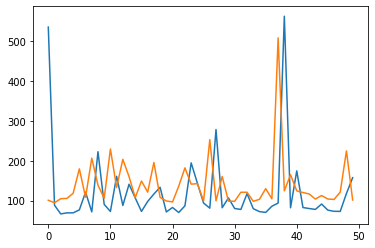

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['val_mean_squared_error'])

#model save

## ModelCheckpoint

In [ ]:
import tensorflow as tf

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
Y = pd.get_dummies(iris.target)
# Y = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data,Y,test_size = 0.3)
import os
# dense_kernel_regularizer = tf.keras.regularizers.l2(0.001)
model = tf.keras.Sequential()
model.add(layers.Input(shape=x_train.shape[1]))
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))

# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
checkpoint_path = "./training/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 체크포인트 콜백 만들기
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=False,
                                                 verbose=0)

model.compile(optimizer='SGD',
            loss='mean_squared_error',
            metrics=['accuracy','mean_squared_error'])
hist = model.fit(x_train, y_train, epochs=50, batch_size=256, validation_split=0.2,verbose=0, callbacks=[checkpoint_callback])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO

In [ ]:
load_checkpoint = model.load_weights(checkpoint_path)

In [ ]:
load_checkpoint.

In [ ]:
load_checkpoint.expect_partial()

##model save

In [ ]:
model.save('./save_model.h5')

In [ ]:
new_model = tf.keras.models.load_model('./save_model.h5')
new_model.summary()
new_model.evaluate(x_test, y_test, verbose=2)

<class 'tensorflow.python.keras.engine.sequential.Sequential'>
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               640       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
2/2 - 0s - loss: 0.2295 - accuracy: 0.6667 - mean_squared_error: 0.2295


[0.22953645884990692, 0.6666666865348816, 0.22953645884990692]

In [ ]:
print(type(new_model))

<class 'tensorflow.python.keras.engine.sequential.Sequential'>
